# Gradient Descent Methods

This tour explores the use of gradient descent method for unconstrained and constrained optimization of a smooth function

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We consider the problem of finding a minimum of a function $f$, hence solving
$$(\mathcal{P}): \min_{x \in \mathbb R^d} f(x)$$
where $f : \mathbb R^d \rightarrow \mathbb R$ is a smooth function.

Note that the minimum is not necessarily unique.
In the general case, $f$ might exhibit local minima, in which case the proposed algorithms is not expected to find a global minimizer of the problem.
In this tour, we restrict our attention to convex function, so that the methods will converge to a global minimizer.

The simplest method is the gradient descent, that computes
$$ x^{(k+1)} = x^{(k)} - \tau_k \nabla f(x^{(k)}), $$
where $\tau_k>0$ is a step size, and $\nabla f(x) \in \mathbb R^d$ is the gradient of $f$ at the point $x$, and $x^{(0)} \in \mathbb R^d$ is any initial point.

In the convex case, if $f$ is of class $C^2$, in order to ensure convergence, the step size should satisfy
$$ 0 < \tau_k < \frac{2}{ \sup_x \|Hf(x)\| } $$
where $Hf(x) \in \mathbb R^{d \times d}$ is the Hessian of $f$ at $x$ and $\|\cdot\|$ is the spectral operator norm (largest eigenvalue).

## Exersice : Gradient Descent in 2-D

We consider a simple problem, corresponding to the minimization of a 2-D quadratic form
$$ f(x) = \frac{1}{2} ( x_1^2 + \eta x_2^2 ) ,\quad x = (x_1, x_2)$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

# Part I (Theoretical analysis)
1. Find a matrix $A$ such that $f(x)=\frac{1}{2}\langle Ax,x\rangle$
2. Find $\eta$ such that the problem $(\mathcal{P}):\min_{x \in \mathbb{R}^2} f(x)$ has an unique solution

# Part II (Numerical manipulation)
In this part, we consider $\eta=4$

In [ ]:
eta = 4

**Question 1** Declare the function $f$.

In [11]:
f = lambda x : ( x[0]**2 + eta*x[1]**2 ) / 2

**Question 2** Let $x \in [-3,1]\times [-6,6]$, dewrite the domain using `meshgrid` method and write the function $f$ in its discreet version $F$.

In [35]:
tx = np.linspace(-.3,1,101)
ty = np.linspace(-.6,.6,101)
[v,u] = np.meshgrid(ty,tx)
F = ( u ** 2 + eta * v ** 2 ) / 2

**Question 3** Use `plt.contourf` to plot the level set of the function $F$

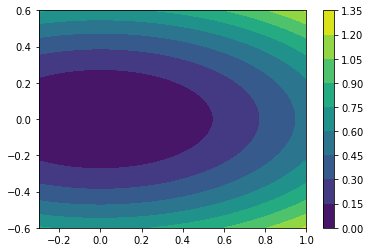

In [36]:
plt.contourf(tx,ty,F.transpose(),10);
plt.colorbar();

In [37]:
# Optional : Graph of the function F
import plotly.graph_objects as go
fig=go.Figure(data=[go.Surface(z=F,x=tx,y=ty)])
fig.update_layout( autosize=False,
                  width=500, height=500,
                  #margin=dict(l=100, r=50, b=65, t=90)
                 )

fig.show()

**Question 4** Since the gradient of $f$ is $\nabla f (x) = (x_0, \eta x_1)$. Write the function `Gradf` to define the gradient of $f$.

In [38]:
Gradf = lambda x : np.array([x[0],eta*x[1]])

### Fixed Step Gradient Descent
In this exercise, the step size should satisfy $\tau_k < 2/\eta$.
We use here a constant step size. 


Write a function `fix_step_dg(f, Gradf,tau, x0, niter)` to perform the gradient descent using a fixed step size $\tau_k=\tau$ with $f$ is a given function, `Gradf` is its gradient, `x0`is an intial vector and `niter`is the maximum iteration number. This function should be return the decay of the energy $f(x^{(k)})$ through the iteration and the iterates solutions so that X(:,k) corresponds to $x^{(k)}$.

In [39]:
def fix_step_dg(f, Gradf, tau, x0, niter = 20):
    x = x0
    E = np.zeros((niter,1))
    X = np.zeros((2,niter))
    for i in np.arange(0,niter):
        X[:,i] = x
        E[i] = f(x)
        x = x - tau*Gradf(x)
    return X, E  
    

**Question 5:** 
**(a)** Test the function for $f$, $x^{(0)} = (0.3, 0.9)$, $\tau = 1.6/\eta$ and $niter = 20$.

In [40]:
tau = 1.6/eta
x0 = np.array( [.9,.3] )
niter = 20
X,  E = fix_step_dg(f, Gradf, tau, x0, niter)

In [41]:
X[:,-1]

array([ 5.48423766e-05, -1.82807922e-05])

**(b)** Display the decay of the energy $f(x^{(k)})$ through the iteration.

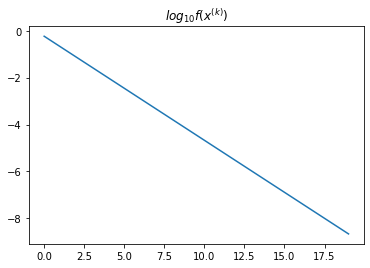

In [42]:
plt.plot(np.log10(E))
plt.axis('tight')
plt.title('$log_{10}f(x^{(k)})$')
plt.show()

**(c)** Display the iterate solutions.

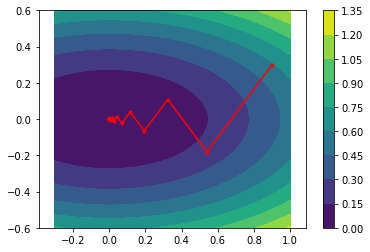

In [43]:
plt.contourf(tx,ty,F.transpose(),10);
plt.colorbar();
plt.plot(X[0,:], X[1,:], 'r.-');
plt.axis('equal'); 

**(d)** Display the iteration for several different step sizes `tau_list = np.array([.5, 1, 1.5, 1.9]) / eta`.

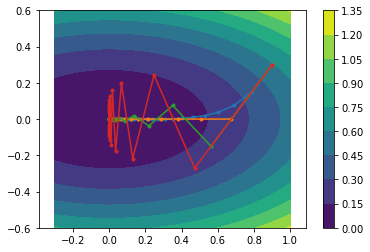

In [44]:
tau_list = np.array([.5, 1, 1.5, 1.9]) / eta
plt.contourf(tx,ty,F.transpose(),10);
plt.colorbar();
for itau in np.arange(0,tau_list.size):
    tau = tau_list[itau]
    X = fix_step_dg(f, Gradf, tau, x0, niter)[0]
    plt.plot(X[0,:], X[1,:], '.-')
plt.axis('equal') 
plt.show()   

### Optimal Step Gradient Descent
We use here an optimal step size. 

**Question (6) (a)**
Write a function `optimal_step_dg(f, Gradf, x0, niter)` to perform the gradient descent using an optimal step size $\tau_k$ with $f$ is a given function, `Gradf` is its gradient, `x0`is an intial vector and `niter`is the maximum iteration number. This function should be return the decay of the energy $f(x^{(k)})$ through the iteration and the iterates solutions so that X(:,k) corresponds to $x^{(k)}$, such that $\tau_k$ is given by
$$\tau_k=\frac{\|d_k\|^2}{\langle Ad_k,d_k\rangle}=\frac{\|\nabla f(x^{(k)})\|^2}{\langle A\nabla f(x^{(k)}),\nabla f(x^{(k)})\rangle}$$
with $A$ is the matrix associated to $f$ 
verify that $\tau_k=\frac{\big(x_1^{(k)}\big)^2+\eta^2\big(x_2^{(k)}\big)^2}{\big(x_1^{(k)}\big)^2+\eta^3\big(x_2^{(k)}\big)^2}$

In [47]:
# since the optimal step size is given by :
# tau = (x[0]**2+eta**2*x[1]**2)/(x[0]**2+eta**3*x[1]**2)
def optimal_step_dg(f, Gradf, x0, niter = 20):
    x = x0
    E = np.zeros((niter,1))
    X = np.zeros((2,niter))
    # optimal step size. # It must be a general formula, I didn't like it.
    for i in np.arange(0,niter):
        X[:,i] = x
        E[i] = f(x)
        tau = (x[0]**2+eta**2*x[1]**2)/(x[0]**2+eta**3*x[1]**2)
        x = x - tau*Gradf(x)
    return X, E 

**(b)** Test this function for $f$ and display the iterate solutions

The approximate solution is x =  [ 3.72966708e-05 -6.99312577e-06]


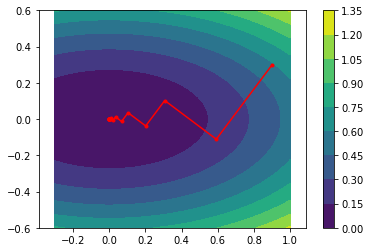

In [48]:
X = optimal_step_dg(f, Gradf, x0, niter)[0]
print('The approximate solution is x = ', X[:,-1])

# Display the iterate solutions
plt.contourf(tx,ty,F.transpose(),10);
plt.colorbar();
plt.plot(X[0,:], X[1,:], 'r.-');
plt.axis('equal')
plt.show()